In [2]:
def plot_figures(train_graphs, lr):
    cur_epochs = train_graphs.log_epochs
    plt.figure(figsize=(15,5))

    plt.subplot(2,5,2)
    plt.semilogy(cur_epochs, train_graphs.loss)
    #plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Loss')

    plt.subplot(2,5,3)
    plt.plot(cur_epochs, train_graphs.accuracy)
    #.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Accuracy')

    plt.subplot(2,5,4)
    plt.semilogy(cur_epochs, train_graphs.wn_grad_loss_ratio)
    #plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Grad Loss Ratio')

    plt.subplot(2,5,5)
    plt.plot(cur_epochs, train_graphs.wn_norm_min)
    #.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Min Norm')

    plt.tight_layout()
    plt.show()

def plot_figures_widths(widths, model_params):
    plt.figure(figsize=(15,5))
    for width in widths:
        model_param = model_params[width]
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **model_param)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)

        cur_epochs = train_graphs.log_epochs
        print(cur_epochs)
        plt.subplot(2,5,1)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')

        plt.subplot(2,5,2)
        plt.plot(cur_epochs, train_graphs.accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Accuracy')

        plt.subplot(2,5,3)
        print(train_graphs.wn_grad_loss_ratio)
        plt.semilogy(cur_epochs, train_graphs.wn_grad_loss_ratio)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Grad Loss Ratio')

        """
        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.wn_norm_min_with_g)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Min Norm with G')
        """
        plt.subplot(2,5,4)
        plt.plot(cur_epochs, train_graphs.test_accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Accuracy')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.wn_norm_min)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Min Norm')

    plt.legend(widths)
    plt.tight_layout()
    plt.show()



In [2]:
import sys
import os
sys.path.append('..')
from main import graphs
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

loss_name = 'MSELoss'

def get_lookup_directory(lr, dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, **kwargs):
    results_dir = "results"
    directory = f"{results_dir}/{dataset_name}/{loss_name}/{opt_name}/{model_name}/"
    for key, value in kwargs.items():
        directory += f"{key}_{value}/"
    directory += f"lr_{lr}/moment_{momentum}/wd_{weight_decay}/batch_size_{batch_size}/"
    return directory

def get_directory(lr, dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs, **kwargs):
    #results_dir = "results"
    #directory = f"{results_dir}/{model_name}/{dataset_name}/{opt_name}/lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/epoch_{epochs}/"
    directory = get_lookup_directory(lr, dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, **kwargs) + f"epoch_{epochs}/"
    print(directory)
    return directory

In [ ]:
! python main.py --dataset cifar --model weight_norm --loss MSELoss --opt sgd --lr 0.0001 --epoch 4000 --analysis loss weight_norm --batch_size 512 --width 4096 --init_mode "O(1/sqrt{m})" --basis_var 0.02 --wn_scale 1 --momentum 0.9

results/cifar/sgd/weight_norm/width_512/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[1464.48974609375, 12852.859375, 24748.8828125, 19364.45703125, 28719.048828125, 52828.47265625, 53459.4921875, 36327.8671875, 36265.4296875, 72460.421875, 102138.234375, 73317.0703125, 85291.765625, 99670.15625, 47377.015625, 56067.1875, 65132.7109375, 72132.6015625, 70939.734375, 65202.5625]
results/cifar/sgd/weight_norm/width_1024/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[3912.177978515625, 16196.2060546875, 21993.63671875, 57140.8515625, 56930.11328125, 110558.7890625, 87757.7578125, 142804.5625, 218794.5, 100240.90625, 179430.640625, 158833.6875, 131206.296875, 155782.21875, 196145.875, 234167.3125, 175

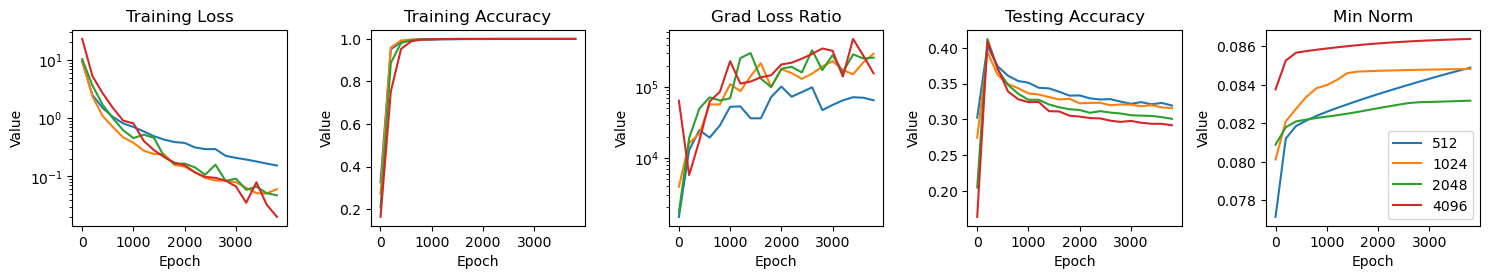

In [51]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.0001, "cifar", "sgd", 0, 512, 4000 
wn_width = 512
model_name = "weight_norm"
model_params = {}
model_params[512] = {"width": 512, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[1024] = {"width": 1024, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[2048] = {"width": 2048, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[4096] = {"width": 4096, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
"""
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
"""
plot_figures_widths([512, 1024, 2048, 4096], model_params)

In [ ]:
! python main.py --dataset cifar --model weight_norm --loss MSELoss --opt sgd --lr 0.01 --epoch 4000 --analysis loss weight_norm --batch_size 512 --width 4096 --init_mode "O(1)" --basis_var 5 --wn_scale 10

In [ ]:
! python main.py --dataset cifar --model weight_norm_torch --loss MSELoss --opt sgd --lr 0.01 --epoch 4000 --analysis loss weight_norm --batch_size 512 --width 512

results/cifar/sgd/weight_norm_torch/width_512/lr_0.01/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[24.61222267150879, 164.87554931640625, 602.7796630859375, 700.350830078125, 895.3888549804688, 486.5162658691406, 1084.6285400390625, 1025.7464599609375, 836.203369140625, 1453.425537109375, 1207.873779296875, 606.736083984375, 1104.340576171875, 1749.410400390625, 1576.0799560546875, 1260.8714599609375, 1185.482177734375, 1107.498291015625, 1229.7034912109375, 1674.141357421875]
results/cifar/sgd/weight_norm_torch/width_1024/lr_0.01/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[30.247909545898438, 316.931640625, 523.7084350585938, 300.5067138671875, 353.5718688964844, 1261.9029541015625, 1257.0274658203125, 2179.69482421875, 2112.18408203125, 1858.9320068359375, 2270.66455078125, 833.6176

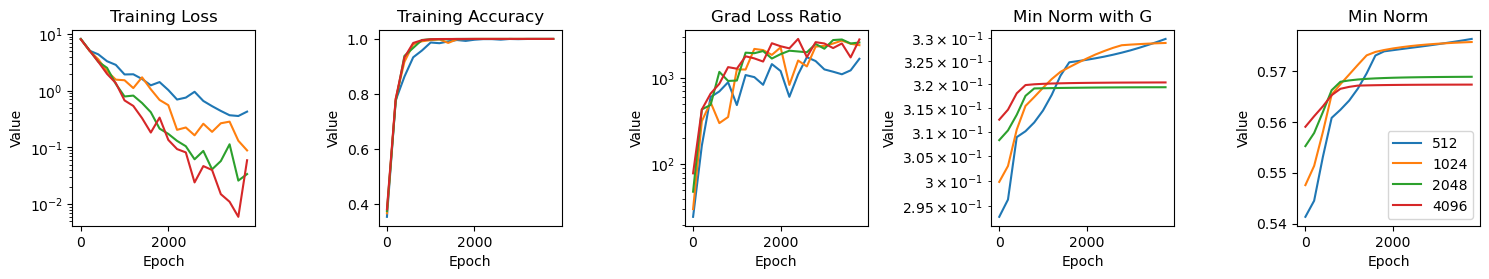

In [25]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 4000 
wn_width = 512
model_name = "weight_norm_torch"
model_params = {}
model_params[512] = {"width": 512}
model_params[1024] = {"width": 1024}
model_params[2048] = {"width": 2048}
model_params[4096] = {"width": 4096}
"""
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
"""
plot_figures_widths([512, 1024, 2048, 4096], model_params)

results/cifar/sgd/weight_norm_torch/width_512/lr_0.01/wd_0/batch_size_512/epoch_40000/
[1, 201, 401, 601, 801, 1001, 1201]
[3.942337989807129, 8.823382377624512, 13.393776893615723, 15.697613716125488, 15.049610137939453, 16.411367416381836, 17.871889114379883]


AttributeError: 'graphs' object has no attribute 'wn_norm_min_with_g'

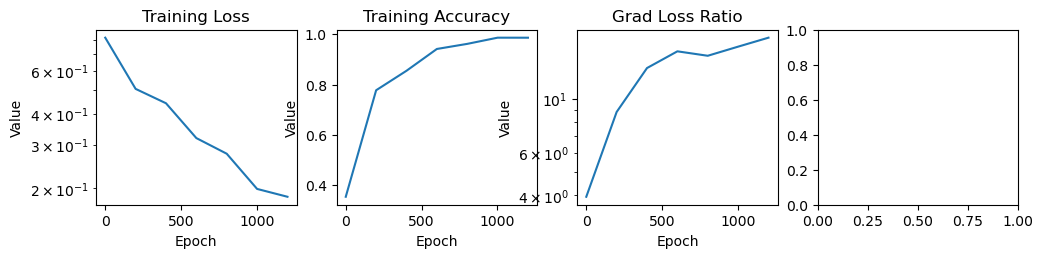

In [19]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 512
model_name = "weight_norm_torch"
model_params = {}
model_params[512] = {"width": 512}
model_params[1024] = {"width": 1024}
"""
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
"""
plot_figures_widths([512, 1024], model_params)

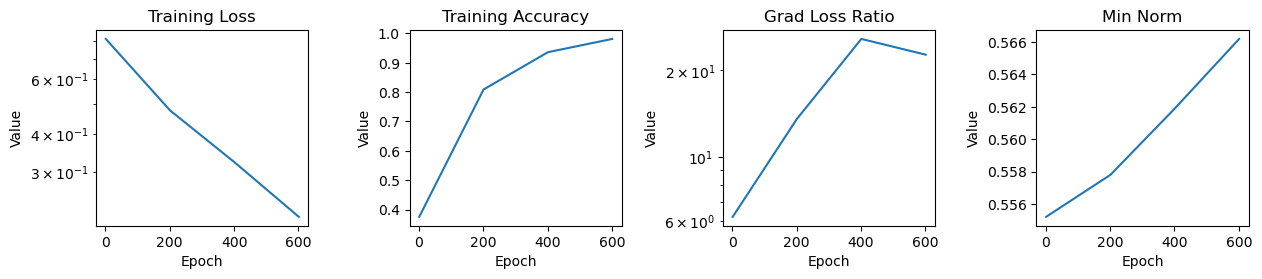

In [44]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 2048
model_name = "weight_norm_torch"
model_params = {"width": wn_width}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)

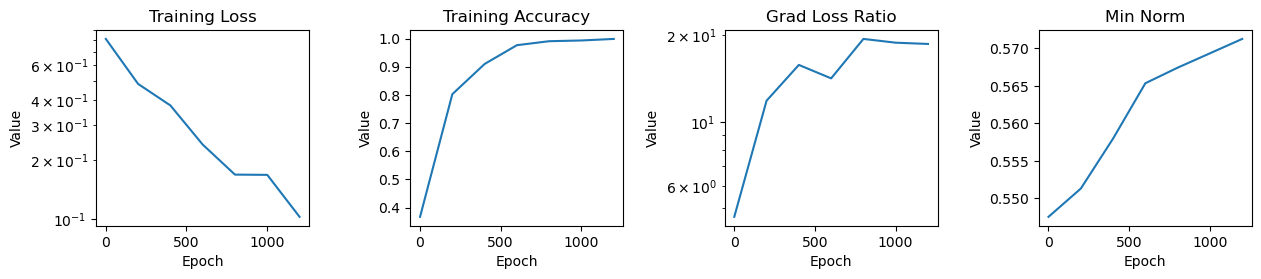

In [43]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 1024
model_name = "weight_norm_torch"
model_params = {"width": wn_width}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)

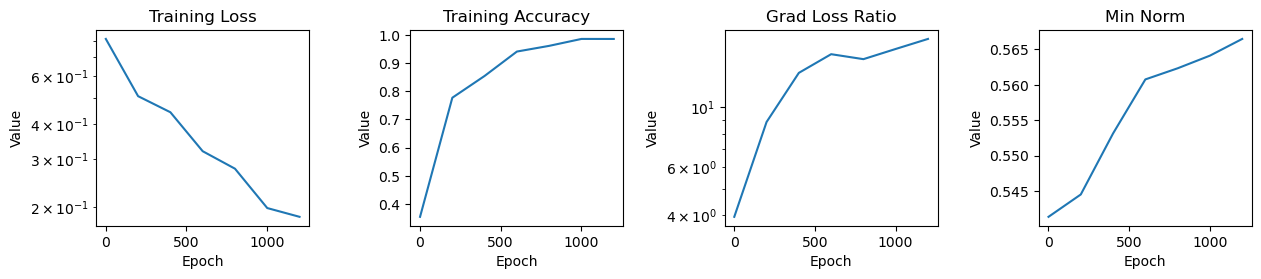

In [41]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 512
model_name = "weight_norm_torch"
model_params = {"width": wn_width}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)

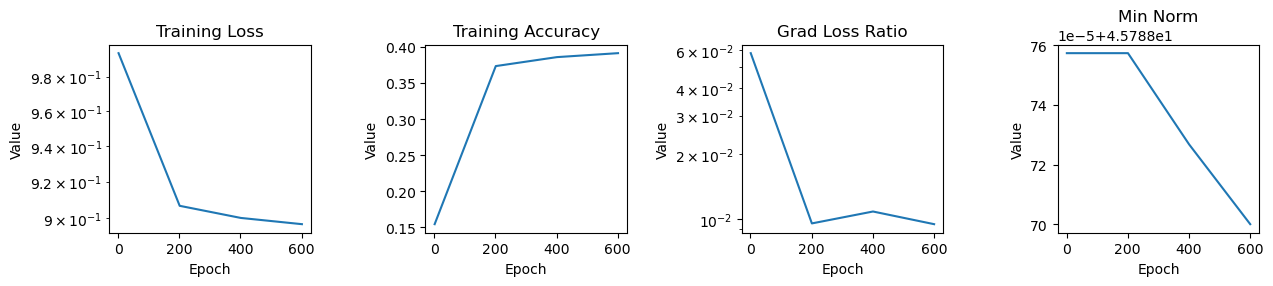

In [36]:
wn_width            = 512 #1024, 2048
wn_init_mode        = "O(1)"#"O(1/sqrt{m})"
wn_basis_var        = 5
wn_scale            = 10

lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
model_name = "weight_norm"
model_params = {"width": wn_width, "init": wn_init_mode, "var": wn_basis_var, "scale": wn_scale}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)


In [13]:
import os
def plot_figures_widths(widths, model_params, width_params):
    plt.figure(figsize=(15,5))
    lines = []
    for width in widths:
        model_param = model_params[width]
        directory = get_directory(width_params[width]["lr"], dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, width_params[width]["epoch"], **model_param)
        run_dir = os.listdir(f'../{directory}')
        prev_runs = [int(x.split("_")[-1]) for x in run_dir if x.startswith("run")]
        loss_list, acc_list, grad_loss_ratio_list, test_acc_list, wn_norm_list = [], [], [],[],[]
        
        for run in prev_runs:
            with open(f'../{directory}run_{run}/train_graphs.pk', 'rb') as f:
                train_graphs = pickle.load(f)
                loss_list.append(train_graphs.loss)
                print(run, len(train_graphs.loss))
                acc_list.append(train_graphs.accuracy)
                grad_loss_ratio_list.append(train_graphs.wn_grad_loss_ratio)
                test_acc_list.append(train_graphs.test_accuracy)
                wn_norm_list.append(train_graphs.wn_norm_min)
                cur_epochs = train_graphs.log_epochs
        print(cur_epochs)

        plt.subplot(2,5,1)
        print(np.array(loss_list).shape)
        means = np.mean(np.array(loss_list), axis=0)
        stds = np.std(np.array(loss_list), axis=0)
        print(means.shape)
        #plt.plot(x, means, label="Estimated Mean")
        print(stds)
        plt.semilogy(cur_epochs, means)
        plt.fill_between(cur_epochs, means - stds, means + stds, alpha=0.3, label="Confidence Interval") # 1-sigma confidence interval
        
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')
        
        plt.subplot(2,5,2)
        means = np.mean(np.array(acc_list), axis=0)
        stds = np.std(np.array(acc_list), axis=0)
        #plt.plot(x, means, label="Estimated Mean")
        plt.plot(cur_epochs, means)
        plt.fill_between(cur_epochs, means - stds, means + stds, alpha=0.3, label="Confidence Interval") 
        #plt.plot(cur_epochs, train_graphs.accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Accuracy')
        
        plt.subplot(2,5,3)
        #print(train_graphs.wn_grad_loss_ratio)
        means = np.mean(np.array(grad_loss_ratio_list), axis=0)
        stds = np.std(np.array(grad_loss_ratio_list), axis=0)
        #plt.plot(x, means, label="Estimated Mean")
        plt.semilogy(cur_epochs, means)
        plt.fill_between(cur_epochs, means - stds, means + stds, alpha=0.3, label="Confidence Interval") 
        #plt.semilogy(cur_epochs, train_graphs.wn_grad_loss_ratio)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Grad Loss Ratio')
        

        plt.subplot(2,5,4)
        means = np.mean(np.array(test_acc_list), axis=0)
        stds = np.std(np.array(test_acc_list), axis=0)
        #plt.plot(x, means, label="Estimated Mean")
        plt.semilogy(cur_epochs, means)
        plt.fill_between(cur_epochs, means - stds, means + stds, alpha=0.3, label="Confidence Interval") 
        #plt.plot(cur_epochs, train_graphs.test_accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Testing Accuracy')

        plt.subplot(2,5,5)
        means = np.mean(np.array(wn_norm_list), axis=0)
        stds = np.std(np.array(wn_norm_list), axis=0)
        #plt.plot(x, means, label="Estimated Mean")
        lines.append(plt.plot(cur_epochs, means)[0])
        plt.fill_between(cur_epochs, means - stds, means + stds, alpha=0.3, label="Confidence Interval") 
        #plt.plot(cur_epochs, train_graphs.wn_norm_min)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Min Norm')
        

    plt.legend(lines, widths)
    plt.tight_layout()
    plt.show()

results/cifar/sgd/weight_norm/width_512/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
results/cifar/sgd/weight_norm/width_1024/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
results/cifar/sgd/weight_norm/width_2048/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
results/cifar/sgd/weight_norm/width_4096/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]


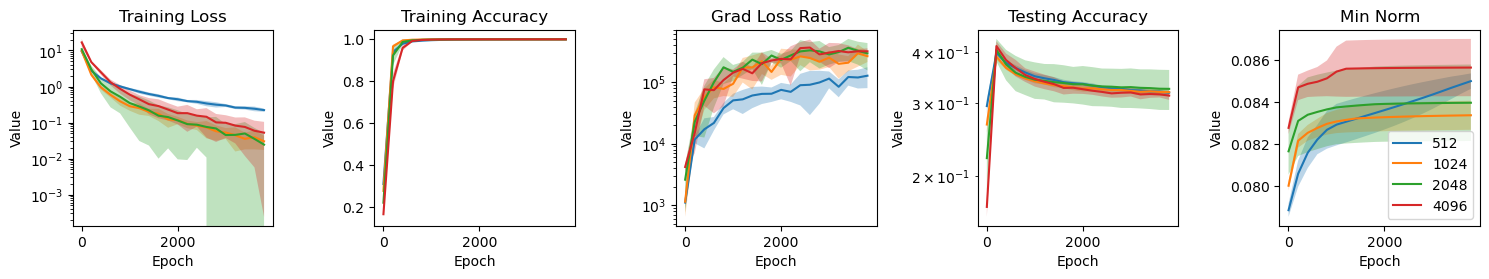

In [28]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.0001, "cifar", "sgd", 0, 512, 4000 
wn_width = 512
model_name = "weight_norm"
model_params = {}
model_params[512] = {"width": 512, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[1024] = {"width": 1024, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[2048] = {"width": 2048, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[4096] = {"width": 4096, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
width_params = {}
width_params[512] = {"lr": lr}
width_params[1024] = {"lr": lr}
width_params[2048] = {"lr": lr}
width_params[4096] = {"lr": lr}

plot_figures_widths([512, 1024, 2048, 4096], model_params, width_params)

results/cifar/sgd/weight_norm/width_1024/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0004/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
results/cifar/sgd/weight_norm/width_2048/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0008/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]


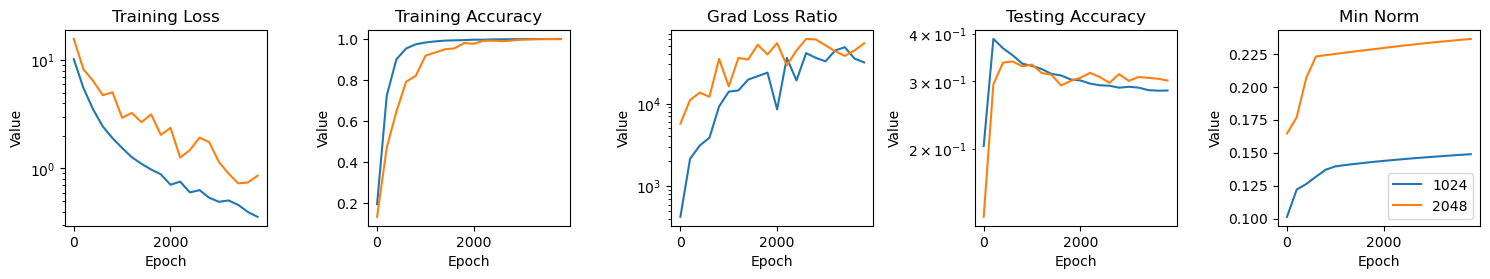

In [18]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.0004, "cifar", "sgd", 0, 512, 4000 
wn_width = 512
model_name = "weight_norm"
model_params = {}
model_params[512] = {"width": 512, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[1024] = {"width": 1024, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[2048] = {"width": 2048, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[4096] = {"width": 4096, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
width_params = {}
width_params[1024] = {"lr": 4e-4}
width_params[2048] = {"lr": 8e-4}

plot_figures_widths([1024, 2048], model_params, width_params)

In [ ]:
! python main.py --dataset cifar --model weight_norm --loss MSELoss --opt sgd --lr 0.0001 --epoch 4000 --analysis loss weight_norm --batch_size 512 --width 2048 --init_mode "O(1/sqrt{m})" --basis_var 0.02 --wn_scale 1 --multiple_run 1

results/cifar/sgd/weight_norm/width_512/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/moment_0/wd_0/batch_size_512/epoch_4000/
2 20
1 20
0 20
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
results/cifar/sgd/weight_norm/width_1024/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/moment_0/wd_0/batch_size_512/epoch_4000/
3 20
2 20
4 20
1 20
0 20
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
results/cifar/sgd/weight_norm/width_2048/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/moment_0/wd_0/batch_size_512/epoch_4000/
3 20
2 20
1 20
0 20
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]


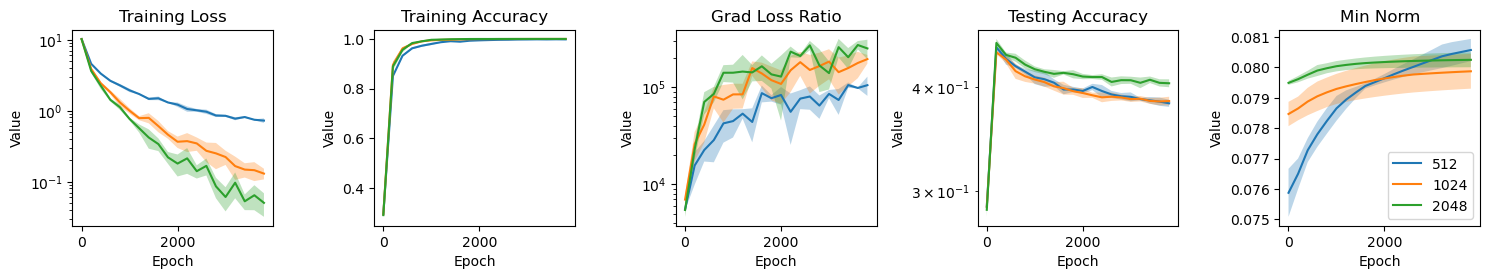

In [56]:
lr, dataset_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.0004, "cifar", "sgd", 0, 0, 512, 4000 
wn_width = 512
model_name = "weight_norm"
model_params = {}
model_params[512] = {"width": 512, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[1024] = {"width": 1024, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[2048] = {"width": 2048, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[4096] = {"width": 4096, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
width_params = {}
width_params[512] = {"lr": 1e-4}
width_params[1024] = {"lr": 1e-4}
width_params[2048] = {"lr": 1e-4}
width_params[4096] = {"lr": 1e-4}

plot_figures_widths([512, 1024, 2048], model_params, width_params)

results/cifar/MSELoss/sgd/weight_norm/width_512/init_O(1/sqrt{m})/var_0.2/scale_1.0/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/
results/cifar/MSELoss/sgd/weight_norm/width_1024/init_O(1/sqrt{m})/var_0.2/scale_1.0/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/
results/cifar/MSELoss/sgd/weight_norm/width_2048/init_O(1/sqrt{m})/var_0.2/scale_1.0/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/


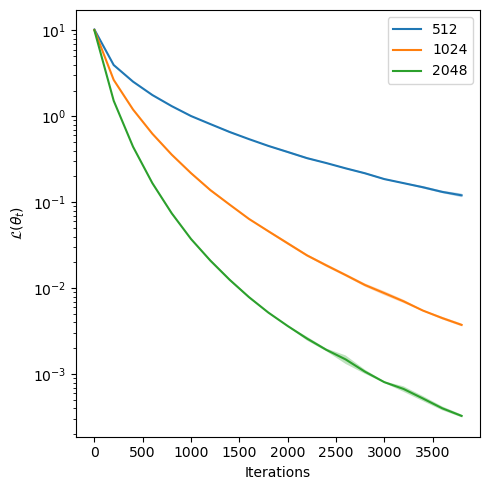

In [56]:
widths = [512, 1024, 2048]
lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.0004, "cifar", 'MSELoss', "sgd", 0.9, 0, 512, 4000 
wn_width = 512
model_name = "weight_norm"
model_params = {}
model_params[512] = {"width": 512, "init": "O(1/sqrt{m})", "var": 0.2, "scale": "1.0"}
model_params[1024] = {"width": 1024, "init": "O(1/sqrt{m})", "var": 0.2, "scale": "1.0"}
model_params[2048] = {"width": 2048, "init": "O(1/sqrt{m})", "var": 0.2, "scale": "1.0"}
model_params[4096] = {"width": 4096, "init": "O(1/sqrt{m})", "var": 0.2, "scale": "1.0"}
width_params = {}
width_params[512] = {"lr": 1e-4}
width_params[1024] = {"lr": 1e-4}
width_params[2048] = {"lr": 1e-4}
width_params[4096] = {"lr": 1e-4}


plt.figure(figsize=(5,5))
lines = []
for width in widths:
    model_param = model_params[width]
    directory = get_directory(width_params[width]["lr"], dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs, **model_param)
    run_dir = os.listdir(f'../{directory}')
    prev_runs = [int(x.split("_")[-1]) for x in run_dir if x.startswith("run")]
    loss_list, acc_list, grad_loss_ratio_list, test_acc_list, wn_norm_list = [], [], [],[],[]
    
    for run in prev_runs:
        with open(f'../{directory}run_{run}/train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)
            loss_list.append(train_graphs.loss)
            cur_epochs = train_graphs.log_epochs

    means = np.mean(np.array(loss_list), axis=0)
    stds = np.std(np.array(loss_list), axis=0)
    #plt.plot(x, means, label="Estimated Mean")
    lines.append(plt.semilogy(cur_epochs, means)[0])
    plt.fill_between(cur_epochs, means - stds, means + stds, alpha=0.3, label="Confidence Interval") # 1-sigma confidence interval
plt.ylabel(r'$\mathcal{L}(\theta_t)$')
plt.xlabel('Iterations')
plt.legend(lines, widths)
plt.tight_layout()
plt.savefig("../plots/weight_norm/loss_cifar10_sgd.pdf")

results/cifar/MSELoss/sgd/weight_norm/width_512/init_O(1/sqrt{m})/var_0.2/scale_1.0/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/
results/cifar/MSELoss/sgd/weight_norm/width_1024/init_O(1/sqrt{m})/var_0.2/scale_1.0/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/
results/cifar/MSELoss/sgd/weight_norm/width_2048/init_O(1/sqrt{m})/var_0.2/scale_1.0/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/


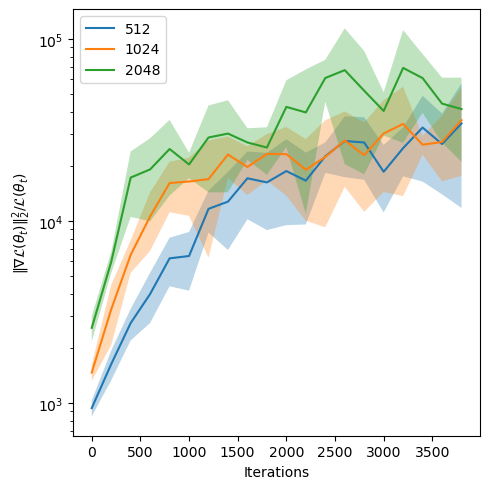

In [57]:
plt.figure(figsize=(5,5))
lines = []
for width in widths:
    model_param = model_params[width]
    directory = get_directory(width_params[width]["lr"], dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs, **model_param)
    run_dir = os.listdir(f'../{directory}')
    prev_runs = [int(x.split("_")[-1]) for x in run_dir if x.startswith("run")]
    loss_list, acc_list, grad_loss_ratio_list, test_acc_list, wn_norm_list = [], [], [],[],[]
    
    for run in prev_runs:
        with open(f'../{directory}run_{run}/train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)
            #loss_list.append(train_graphs.loss)
            grad_loss_ratio_list.append(train_graphs.wn_grad_loss_ratio)
            cur_epochs = train_graphs.log_epochs

    means = np.mean(np.array(grad_loss_ratio_list), axis=0)
    stds = np.std(np.array(grad_loss_ratio_list), axis=0)
    #plt.plot(x, means, label="Estimated Mean")
    lines.append(plt.semilogy(cur_epochs, means)[0])
    plt.fill_between(cur_epochs, means - stds, means + stds, alpha=0.3, label="Confidence Interval") # 1-sigma confidence interval
plt.ylabel(r'$\Vert \nabla \mathcal{L}(\theta_t)\Vert_2^2/\mathcal{L}(\theta_t)$')
plt.xlabel('Iterations')
plt.legend(lines, widths)
plt.tight_layout()
plt.savefig("../plots/weight_norm/grad_loss_ratio_cifar10_sgd.pdf")

results/cifar/MSELoss/sgd/weight_norm/width_512/init_O(1/sqrt{m})/var_0.2/scale_1.0/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/
results/cifar/MSELoss/sgd/weight_norm/width_1024/init_O(1/sqrt{m})/var_0.2/scale_1.0/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/
results/cifar/MSELoss/sgd/weight_norm/width_2048/init_O(1/sqrt{m})/var_0.2/scale_1.0/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/
[0.24  0.242 0.244 0.246 0.248 0.25  0.252] [Text(0, 0.24, '0.240'), Text(0, 0.242, '0.242'), Text(0, 0.244, '0.244'), Text(0, 0.246, '0.246'), Text(0, 0.248, '0.248'), Text(0, 0.25, '0.250'), Text(0, 0.252, '0.252')]


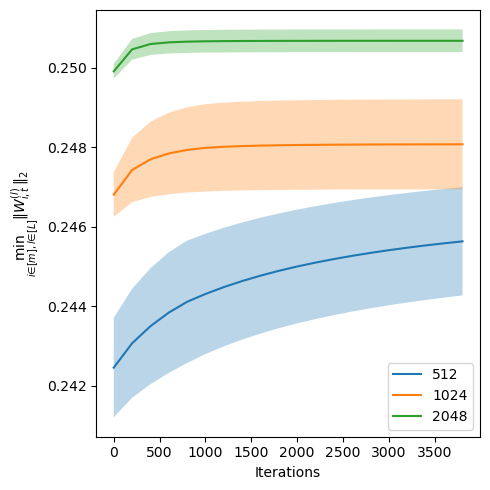

In [58]:
from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(figsize=(5,5))

lines = []
for width in widths:
    model_param = model_params[width]
    directory = get_directory(width_params[width]["lr"], dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, epochs, **model_param)
    run_dir = os.listdir(f'../{directory}')
    prev_runs = [int(x.split("_")[-1]) for x in run_dir if x.startswith("run")]
    loss_list, acc_list, grad_loss_ratio_list, test_acc_list, wn_norm_list = [], [], [],[],[]
    
    for run in prev_runs:
        with open(f'../{directory}run_{run}/train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)
            #loss_list.append(train_graphs.loss)
            wn_norm_list.append(train_graphs.wn_norm_min)
            cur_epochs = train_graphs.log_epochs

    means = np.mean(np.array(wn_norm_list), axis=0)
    stds = np.std(np.array(wn_norm_list), axis=0)
    #plt.plot(x, means, label="Estimated Mean")
    lines.append(ax.plot(cur_epochs, means)[0])
    ax.fill_between(cur_epochs, means - stds, means + stds, alpha=0.3, label="Confidence Interval") # 1-sigma confidence interval
#plt.title(r'${\min_{\substack{i\in[m]\\l\in[L]}}\Vert W^{(l)}_{i,t}\Vert_2}$')
plt.ylabel(r'${\min_{i\in[m], l\in[L]}\Vert W^{(l)}_{i,t}\Vert_2}$')
plt.xlabel('Iterations')
plt.legend(lines, widths)
plt.tight_layout()
locs,labels = plt.yticks()
print(locs, labels)
plt.savefig("../plots/weight_norm/min_weight_norm_cifar10_sgd.pdf")

results/cifar/MSELoss/sgd/weight_norm/width_512/init_O(1/sqrt{m})/var_0.2/scale_1.0/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/
3 20
2 20
4 20
1 20
0 20
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[0.02625011 0.01631902 0.01240899 0.01655973 0.01219527 0.01145272
 0.00688083 0.01520751 0.00203693 0.00723183 0.00951551 0.00776103
 0.00354538 0.00448053 0.00470123 0.00355602 0.00255115 0.00482155
 0.00426024 0.00592916]
results/cifar/MSELoss/sgd/weight_norm/width_1024/init_O(1/sqrt{m})/var_0.2/scale_1.0/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/
3 20
2 20
4 20
1 20
0 20
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[4.85747207e-02 1.97505633e-02 6.75348265e-03 1.16723052e-02
 4.94160786e-03 4.09088344e-03 3.90138432e-03 1.56005451e-03
 4.70495222e-04 1.28535787e-03 1.19324767e-03 7.43591007e-04
 7.16197535e-04 5.19223869e-04 4.709633

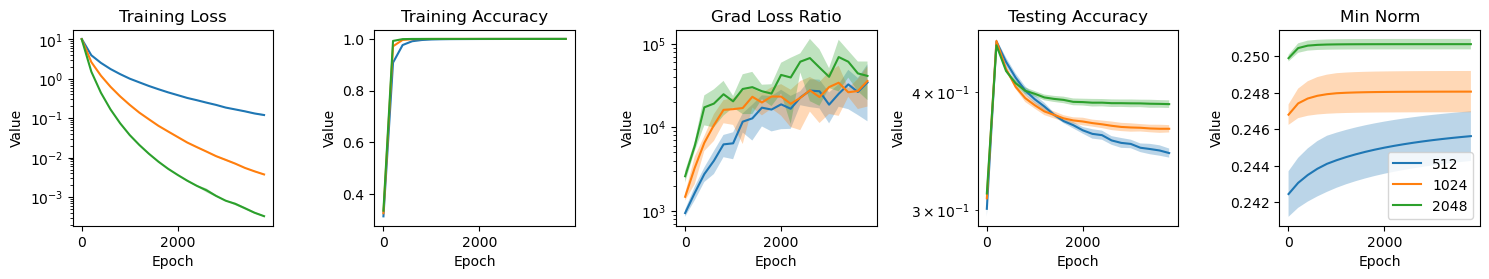

In [13]:
lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.0001, "cifar", "MSELoss", "sgd", 0.9, 0, 512, 4000 
wn_width = 512
model_name = "weight_norm"
model_params = {}
model_params[512] = {"width": 512, "init": "O(1/sqrt{m})", "var": 0.2, "scale": "1.0"}
model_params[1024] = {"width": 1024, "init": "O(1/sqrt{m})", "var": 0.2, "scale": "1.0"}
model_params[2048] = {"width": 2048, "init": "O(1/sqrt{m})", "var": 0.2, "scale": "1.0"}
model_params[4096] = {"width": 4096, "init": "O(1/sqrt{m})", "var": 0.2, "scale": "1.0"}
width_params = {}
width_params[512] = {"lr": 1e-4}
width_params[1024] = {"lr": 1e-4}
width_params[2048] = {"lr": 1e-4}
width_params[4096] = {"lr": 1e-4}

plot_figures_widths([512, 1024, 2048], model_params, width_params)

results/cifar/MSELoss/sgd/weight_norm/width_512/init_O(1/sqrt{m})/var_1.0/scale_1.0/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/
1 20
0 20
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[0.02233423 0.02732613 0.02696635 0.02234556 0.02665993 0.02412214
 0.01900264 0.02216507 0.02253755 0.01885591 0.01366934 0.01379117
 0.01074179 0.01048777 0.00524433 0.00523187 0.00257802 0.00483401
 0.00725253 0.00646488]
results/cifar/MSELoss/sgd/weight_norm/width_1024/init_O(1/sqrt{m})/var_1.0/scale_1.0/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/
1 20
0 20
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[0.00140888 0.00196303 0.00289535 0.0050251  0.00926969 0.00472596
 0.00567412 0.0032259  0.00422376 0.00444549 0.00392682 0.00321671
 0.00355636 0.00320342 0.00432442 0.00317333 0.00261153 0.00312256
 0.00266125 0.00264486]
results/cifar/MSELoss/sgd/w

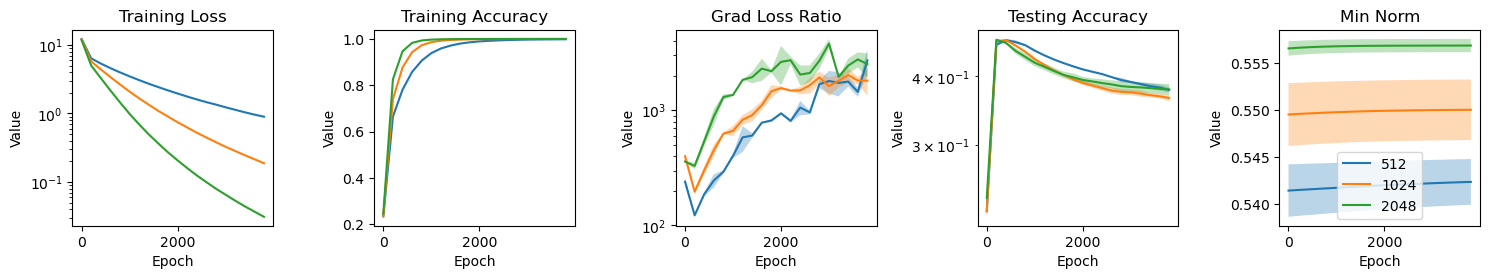

In [4]:
lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.0001, "cifar", "MSELoss", "sgd", 0.9, 0, 512, 4000 
wn_width = 512
model_name = "weight_norm"
model_params = {}
model_params[512] = {"width": 512, "init": "O(1/sqrt{m})", "var": 1.0, "scale": "1.0"}
model_params[1024] = {"width": 1024, "init": "O(1/sqrt{m})", "var": 1.0, "scale": "1.0"}
model_params[2048] = {"width": 2048, "init": "O(1/sqrt{m})", "var": 1.0, "scale": "1.0"}
model_params[4096] = {"width": 4096, "init": "O(1/sqrt{m})", "var": 1.0, "scale": "1.0"}
width_params = {}
width_params[512] = {"lr": 1e-4}
width_params[1024] = {"lr": 1e-4}
width_params[2048] = {"lr": 1e-4}
width_params[4096] = {"lr": 1e-4}

plot_figures_widths([512, 1024, 2048], model_params, width_params)

In [ ]:
! python main.py --dataset cifar --model WideResNet_WN_woG --loss MSELoss --opt sgd --lr 0.0001 --epoch 4000 --analysis loss weight_norm --batch_size 512 --width_factor 1 --momentum 0.9

results/cifar/MSELoss/sgd/WideResNet_WN_woG/width_factor_1/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/
0 20
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
(1, 20)
(20,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
results/cifar/MSELoss/sgd/WideResNet_WN_woG/width_factor_4/lr_0.0001/moment_0.9/wd_0/batch_size_512/epoch_4000/
0 10
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801]
(1, 10)
(10,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


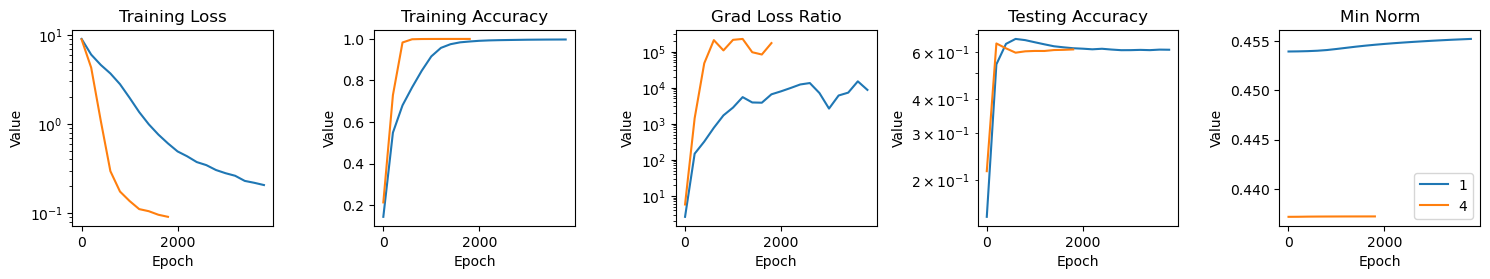

In [61]:
lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.0001, "cifar", "MSELoss", "sgd", 0.9, 0, 512, 4000 
wn_width = 512
model_name = "WideResNet_WN_woG"
model_params = {}
model_params[1] = {"width_factor": 1}
model_params[4] = {"width_factor": 4}
width_params = {}
width_params[1] = {"lr": 1e-4}
width_params[4] = {"lr": 1e-4}
width_params[2048] = {"lr": 1e-4}
width_params[4096] = {"lr": 1e-4}

plot_figures_widths([1, 4], model_params, width_params)

In [ ]:
! python main.py --dataset cifar --model weight_norm_width_scale --loss MSELoss --opt gd --lr 0.12 --epoch 5000 --analysis loss weight_norm --batch_size 4096 --width 2048 --init_mode "O(1)" --basis_var 50 --wn_scale 20 --log_interval 20
! python main.py --dataset cifar --model weight_norm_width_scale --loss MSELoss --opt gd --lr 0.12 --epoch 5000 --analysis loss weight_norm --batch_size 4096 --width 256 --init_mode "O(1)" --basis_var 0.5 --wn_scale 20 --log_interval 20

results/cifar/MSELoss/gd/weight_norm_width_scale/width_256/init_O(1)/var_0.05/scale_20.0/lr_0.12/moment_0/wd_0/batch_size_4096/epoch_5000/
0 250
[1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201, 221, 241, 261, 281, 301, 321, 341, 361, 381, 401, 421, 441, 461, 481, 501, 521, 541, 561, 581, 601, 621, 641, 661, 681, 701, 721, 741, 761, 781, 801, 821, 841, 861, 881, 901, 921, 941, 961, 981, 1001, 1021, 1041, 1061, 1081, 1101, 1121, 1141, 1161, 1181, 1201, 1221, 1241, 1261, 1281, 1301, 1321, 1341, 1361, 1381, 1401, 1421, 1441, 1461, 1481, 1501, 1521, 1541, 1561, 1581, 1601, 1621, 1641, 1661, 1681, 1701, 1721, 1741, 1761, 1781, 1801, 1821, 1841, 1861, 1881, 1901, 1921, 1941, 1961, 1981, 2001, 2021, 2041, 2061, 2081, 2101, 2121, 2141, 2161, 2181, 2201, 2221, 2241, 2261, 2281, 2301, 2321, 2341, 2361, 2381, 2401, 2421, 2441, 2461, 2481, 2501, 2521, 2541, 2561, 2581, 2601, 2621, 2641, 2661, 2681, 2701, 2721, 2741, 2761, 2781, 2801, 2821, 2841, 2861, 2881, 2901, 2921, 2941, 2961, 2981, 3001, 3021

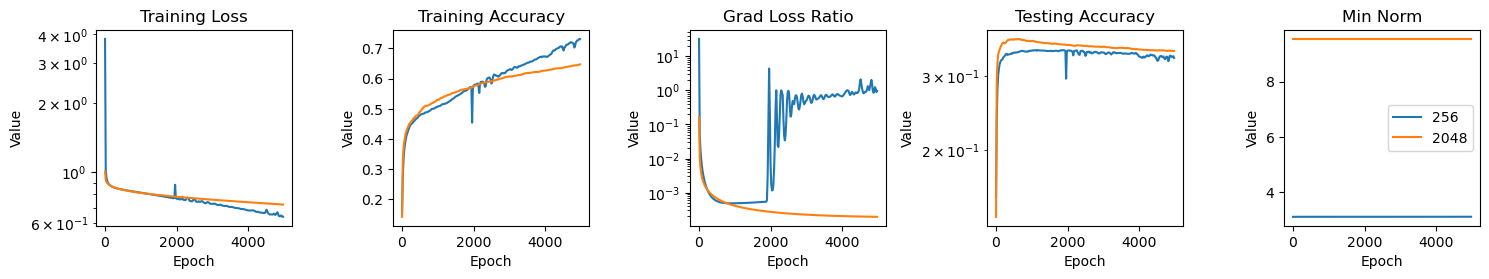

In [56]:
lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, epochs = 0.12, "cifar", "MSELoss", "gd", 0, 0, 4096, 5000 
wn_width = 526
model_name = "weight_norm_width_scale"
model_params = {}
model_params[256] = {"width": 256, "init": "O(1)", "var": 0.05, "scale": 20.0}
model_params[1024] = {"width": 1024, "init": "O(1/sqrt{m})", "var": 1.0, "scale": "1.0"}
model_params[2048] = {"width": 2048, "init": "O(1)", "var": 0.05, "scale": 20.0}
#model_params[2048] = {"width": 2048, "init": "O(1)", "var": 50.0, "scale": 20.0}
model_params[4096] = {"width": 4096, "init": "O(1/sqrt{m})", "var": 50.0, "scale": 20.0}
width_params = {}
width_params[256] = {"lr": lr, "epoch":5000}
width_params[1024] = {"lr": lr}
width_params[2048] = {"lr": lr, "epoch":5000}
width_params[4096] = {"lr": lr}

plot_figures_widths([256, 2048], model_params, width_params)

In [ ]:
fig, ax1 = plt.subplots(figsize=[6, 5])
ax2 = ax1.twinx()

lines = []
for width, basis_var in zip(widths, basis_vars):
    x = np.arange(len(loss_list_new[model][depth][init_mode][basis_var][scale][lr_mode][basis_lr][str(width)][0]))[20:50]
    #all_but_five = [0,1,2,3,4,6,7,8,9]
    array_oi = np.array(loss_list_new[model][depth][init_mode][basis_var][scale][lr_mode][basis_lr][str(width)])[:,21:51] / np.array(loss_list_new[model][depth][init_mode][basis_var][scale][lr_mode][basis_lr][str(width)])[:,20:50]#[np.ix_(all_but_five)]
    means = np.mean(array_oi, axis=0)
    stds = np.std(array_oi, axis=0)
    lines.append(ax1.plot(x, means, label=str(width) + " " +str(basis_var), linestyle=line_styles[width], color=COLOR_rate)[0])
    #plt.fill_between(x, means - stds, means + stds, alpha=0.3, label="Confidence Interval") # 1-sigma confidence interval

#plt.legend(lines, widths)
#plt.xticks(x[::4], 100 * x[::4])
ax1.set_ylabel(r"$L(\theta_{t+1}) / L(\theta_t)$")
ax1.yaxis.label.set_color(COLOR_rate)

lines = []
#fig, ax = plt.subplots(figsize=[6, 5])
#plt.yscale("log")
ax2.set_yscale("log")
for width, basis_var in zip(widths, basis_vars):
    x = np.arange(len(grad_loss_ratio_new[model][depth][init_mode][basis_var][scale][lr_mode][basis_lr][str(width)][0]))[20:50]
    array_oi = np.array(grad_loss_ratio_new[model][depth][init_mode][basis_var][scale][lr_mode][basis_lr][str(width)])[:,20:50] 
    means = np.mean(array_oi, axis=0)
    stds = np.std(array_oi, axis=0)
    lines.append(ax2.plot(x, means, label=str((width,basis_var)), linestyle=line_styles[width], color=COLOR_ratio)[0])
    #plt.fill_between(x, means - stds, means + stds, alpha=0.3, label="Confidence Interval") # 1-sigma confidence interval

ax2.set_ylabel(r"$\Vert \nabla L(\theta_t) \Vert^2$ / $L(\theta_t)$")
ax2.yaxis.label.set_color(COLOR_ratio)
ax2.legend(lines, [l.get_label() for l in lines])
leg = ax2.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
#plt.xticks(x[::50], 100 * x[::50])
plt.xticks(x[::4], 100 * x[::4])
#plt.xlabel("Iterations")
ax1.set_xlabel("Iterations")
#ax2.xaxis.label.set_color("black")
plt.tight_layout()

results/cifar/MSELoss/gd/weight_norm_width_scale/width_512/init_O(1)/var_0.5/scale_20.0/lr_0.12/moment_0/wd_0/batch_size_4096/epoch_5000/
7.772808074951172
201
(1, 49)
results/cifar/MSELoss/gd/weight_norm_width_scale/width_2048/init_O(1)/var_50.0/scale_20.0/lr_0.12/moment_0/wd_0/batch_size_4096/epoch_5000/
7.450270175933838
250
(1, 49)


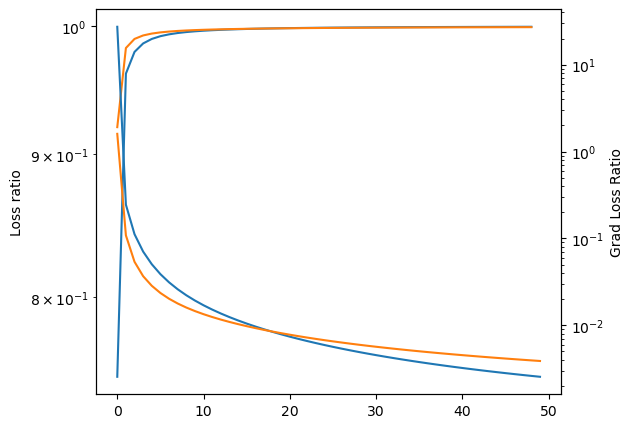

In [43]:
fig, ax1 = plt.subplots(figsize=[6, 5])
ax2 = ax1.twinx()

widths = [512, 2048]
lines = []
for width in widths:
    model_param = model_params[width]
    directory = get_directory(width_params[width]["lr"], dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, width_params[width]["epoch"], **model_param)
    run_dir = os.listdir(f'../{directory}')
    prev_runs = [int(x.split("_")[-1]) for x in run_dir if x.startswith("run")]
    loss_list, acc_list, grad_loss_ratio_list, test_acc_list, wn_norm_list = [], [], [],[],[]
    
    for run in prev_runs:
        with open(f'../{directory}run_{run}/train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)
            loss_list.append(train_graphs.loss)
            acc_list.append(train_graphs.accuracy)
            grad_loss_ratio_list.append(train_graphs.wn_grad_loss_ratio)
            test_acc_list.append(train_graphs.test_accuracy)
            wn_norm_list.append(train_graphs.wn_norm_min)
            cur_epochs = train_graphs.log_epochs
    
    #print(np.array(loss_list).shape)
    print(loss_list[0][-1])
    loss_list = np.array(loss_list)[:,:50]
    loss_ratio = loss_list[:,1:]/loss_list[:,:-1]
    print(len(cur_epochs))
    print(loss_ratio.shape)
    ax1.semilogy(np.arange(loss_ratio.shape[1]), loss_ratio[0])
    
    #plt.legend(['Loss + Weight Decay'])
    ax1.set_ylabel('Loss ratio')

     #print(train_graphs.wn_grad_loss_ratio)
    means = np.mean(np.array(grad_loss_ratio_list), axis=0)[:50]
    ax2.semilogy(np.arange(means.shape[0]), means)
    ax2.set_ylabel('Grad Loss Ratio')

In [37]:
lines = []
means_list = []
min_v, max_v = 100, -100
#fig, ax = plt.subplots(figsize=[6, 5])
#plt.yscale("log")
ax.set_yscale("log")
for width, basis_var in zip(widths, basis_vars):
    x = np.arange(len(grad_loss_ratio_new[model][depth][init_mode][basis_var][scale][lr_mode][basis_lr][str(width)][0]))[20:50]
    array_oi = np.array(grad_loss_ratio_new[model][depth][init_mode][basis_var][scale][lr_mode][basis_lr][str(width)])[:,20:50] 
    means = np.mean(array_oi, axis=0)
    stds = np.std(array_oi, axis=0)
    lines.append(ax.plot(x, means, label=str((width,basis_var)), linestyle=line_styles[width], color=COLOR_ratio)[0])
    min_v = min(np.min(means), min_v)
    max_v = max(np.max(means), max_v)
    means_list.append(means)
    #plt.fill_between(x, means - stds, means + stds, alpha=0.3, label="Confidence Interval") # 1-sigma confidence interval

ax.set_ylabel(r"$\Vert \nabla L(\theta_t) \Vert^2$ / $L(\theta_t)$")
ax.yaxis.label.set_color(COLOR_ratio)
ax.legend(lines, [l.get_label() for l in lines])
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
#plt.xticks(x[::50], 100 * x[::50])
plt.xticks(x[::4], 100 * x[::4])
#plt.xlabel("Iterations")
ax.set_xlabel("Iterations")

crossover_point = np.argmin(np.abs(means_list[0]-means_list[1]))
print(crossover_point)


means = []
for width, basis_var in zip(widths, basis_vars):
    x = np.arange(len(loss_list_new[model][depth][init_mode][basis_var][scale][lr_mode][basis_lr][str(width)][0]))[20:50]
    #all_but_five = [0,1,2,3,4,6,7,8,9]
    array_oi = np.array(loss_list_new[model][depth][init_mode][basis_var][scale][lr_mode][basis_lr][str(width)])[:,21:51] / np.array(loss_list_new[model][depth][init_mode][basis_var][scale][lr_mode][basis_lr][str(width)])[:,20:50]#[np.ix_(all_but_five)]
    means.append(np.mean(array_oi, axis=0))
    #lines.append(ax1.plot(x, means, label=str(width) + " " +str(basis_var), linestyle=line_styles[width], color=COLOR_rate)[0])
    #plt.fill_between(x, means - stds, means + stds, alpha=0.3, label="Confidence Interval") # 1-sigma confidence interval
assert len(means) == 2
crossover_point = np.argmin(np.abs(means[0]-means[1]))
plt.fill_between([x[0], x[crossover_point]],[min_v,min_v],[max_v,max_v], alpha=0.3)
plt.fill_between([x[crossover_point],x[-1]],[min_v,min_v],[max_v,max_v], alpha=0.3)
print(crossover_point)
plt.tight_layout()

array([[10.03618717,  9.23447895,  9.06877995,  8.97301483,  8.90371323,
         8.84855366,  8.80233574,  8.76231289,  8.72685146,  8.69490147,
         8.66575146,  8.63889503,  8.61396217,  8.59067154,  8.56880093,
         8.5481739 ,  8.52864647,  8.5100975 ,  8.49242783,  8.47555256,
         8.45939636,  8.44389534,  8.42899418,  8.4146452 ,  8.40080452,
         8.38743305,  8.37449646,  8.36196518,  8.34981155,  8.33801079,
         8.32653999,  8.31537914,  8.30451012,  8.29391575,  8.28357983,
         8.27349091,  8.26363277,  8.25399494,  8.24456787,  8.23533916,
         8.22630024,  8.21744347,  8.20875931,  8.20024014,  8.19188023,
         8.183671  ,  8.17560959,  8.16768551,  8.15989685,  8.15223885]])

results/cifar/MSELoss/gd/weight_norm_width_scale/width_512/init_O(1)/var_0.5/scale_20.0/lr_0.12/moment_0/wd_0/batch_size_4096/epoch_5000/
results/cifar/MSELoss/gd/weight_norm_width_scale/width_2048/init_O(1)/var_50.0/scale_20.0/lr_0.12/moment_0/wd_0/batch_size_4096/epoch_5000/
17
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48]


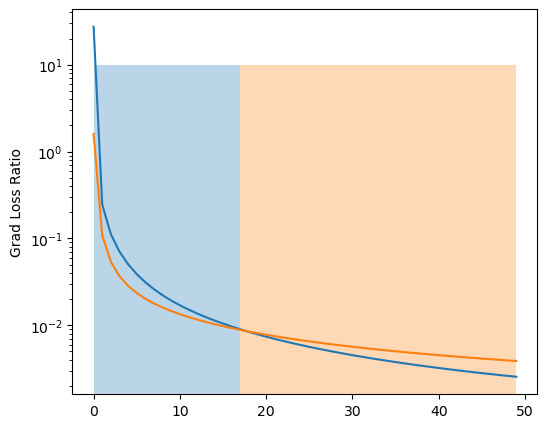

In [51]:
lines = []
means_list = []
min_v, max_v = 100, -100
#fig, ax = plt.subplots(figsize=[6, 5])
#plt.yscale("log")
fig, ax = plt.subplots(figsize=[6, 5])
ax.set_yscale("log")
for width in widths:
    model_param = model_params[width]
    directory = get_directory(width_params[width]["lr"], dataset_name, loss_name, opt_name, model_name, momentum, weight_decay, batch_size, width_params[width]["epoch"], **model_param)
    run_dir = os.listdir(f'../{directory}')
    prev_runs = [int(x.split("_")[-1]) for x in run_dir if x.startswith("run")]
    loss_list, acc_list, grad_loss_ratio_list, test_acc_list, wn_norm_list = [], [], [],[],[]
    
    for run in prev_runs:
        with open(f'../{directory}run_{run}/train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)
            loss_list.append(train_graphs.loss)
            acc_list.append(train_graphs.accuracy)
            grad_loss_ratio_list.append(train_graphs.wn_grad_loss_ratio)
            test_acc_list.append(train_graphs.test_accuracy)
            wn_norm_list.append(train_graphs.wn_norm_min)
            cur_epochs = train_graphs.log_epochs

    means = np.mean(np.array(grad_loss_ratio_list), axis=0)[:50]
    ax.semilogy(np.arange(means.shape[0]), means)
    ax.set_ylabel('Grad Loss Ratio')

    loss_list = np.array(loss_list)[:,:50]
    loss_ratio = loss_list[:,1:]/loss_list[:,:-1]
    means_list.append(loss_ratio)

    x = np.arange(means.shape[0])
crossover_point = np.argmin(np.abs(means_list[0] - means_list[1]))
print(np.argmin(np.abs(means_list[0] - means_list[1])))
print(np.where(means_list[0][0] > means_list[1][0])[0])

min_v, max_v = 0, 10
plt.fill_between([x[0], x[crossover_point]],[min_v,min_v],[max_v,max_v], alpha=0.3)
plt.fill_between([x[crossover_point],x[-1]],[min_v,min_v],[max_v,max_v], alpha=0.3)

In [49]:
means_list[0] - means_list[1]

array([[-1.70931973e-01, -2.04901717e-02, -1.05207665e-02,
        -6.50787293e-03, -4.38204382e-03, -3.10640682e-03,
        -2.27683705e-03, -1.70502747e-03, -1.29286196e-03,
        -9.85860551e-04, -7.50914758e-04, -5.67443484e-04,
        -4.21879480e-04, -3.04561055e-04, -2.08679751e-04,
        -1.30066745e-04, -6.41050353e-05, -9.48176342e-06,
         3.67414981e-05,  7.60676359e-05,  1.09689173e-04,
         1.38358635e-04,  1.63184668e-04,  1.84482436e-04,
         2.03034313e-04,  2.19056471e-04,  2.33229242e-04,
         2.45428221e-04,  2.56107890e-04,  2.65378563e-04,
         2.73815820e-04,  2.80723768e-04,  2.86909134e-04,
         2.92486981e-04,  2.96996492e-04,  3.01243142e-04,
         3.04767795e-04,  3.07569695e-04,  3.10227408e-04,
         3.12395330e-04,  3.14073645e-04,  3.15493832e-04,
         3.16657844e-04,  3.17450342e-04,  3.18103193e-04,
         3.18386709e-04,  3.18881736e-04,  3.18774200e-04,
         3.18413442e-04]])